In [2]:
import ezkl
import torch
from torch import nn
import json
import os
import time
import scipy
import numpy as np
import matplotlib.pyplot as plt
import statistics
import math

In [3]:
%run -i ../../bench.py

In [4]:
data_50_path = os.path.join('data_50.json')
data_100_path = os.path.join('data_100.json')
data_300_path = os.path.join('data_300.json')
data_600_path = os.path.join('data_600.json')
data_1000_path = os.path.join('data_1000.json')

In [5]:
def gen_param_func(data_tensor_array):
    # for 1 value, just have 1 element in tensor array
    data_tensor = data_tensor_array[0]
    return [torch.sqrt(torch.var(data_tensor, correction = 1)),torch.mean(data_tensor)]

def model_func(param):
    class verifier_model(nn.Module):
        def __init__(self):
            super(verifier_model, self).__init__()
            self.w = nn.Parameter(data = param[0], requires_grad = False)
            self.data_mean = nn.Parameter(data = param[1], requires_grad = False)

        def forward(self,X):
            # here is witness approach
            x_mean_cons = torch.abs(torch.sum(X)-X.size()[1]*(self.data_mean))<=torch.abs(0.01*X.size()[1]*self.data_mean)
            return (torch.logical_and(torch.abs(torch.sum((X-self.data_mean)*(X-self.data_mean))-self.w*self.w*(X.size()[1]-1))<=torch.abs(0.02*self.w*self.w*(X.size()[1]-1)),x_mean_cons),self.w)
    return verifier_model

sm_time =[0,0,0,0,0]
med_time = [0,0,0,0,0]
lar_std_time = [0,0,0,0,0]

Summary of Proving Time (1% accuracy)

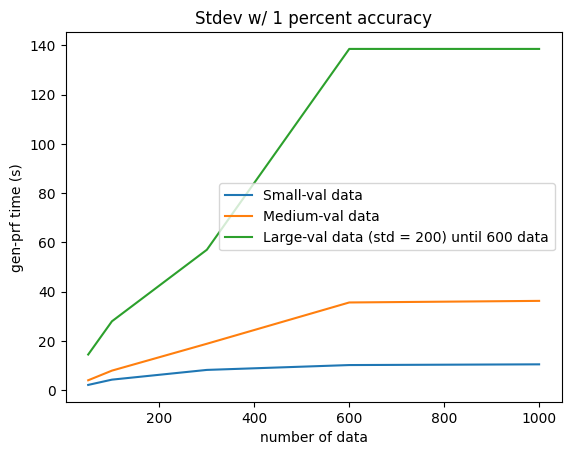

In [15]:
# Hence calibrate scale accordingly to compres the circuit size as long as the answer still within 1 percent
import matplotlib.pyplot as plt
data_number = [50, 100, 300, 600, 1000]
# sm_time = [2.211439847946167, 4.354164123535156, 8.301262855529785, 10.268847942352295, 10.561621904373169]
plt.title("Stdev w/ 1 percent accuracy")
plt.xlabel("number of data")
plt.ylabel("gen-prf time (s)")
plt.plot(data_number, sm_time, label = 'Small-val data')

# med_time = [4.099258899688721, 8.011964797973633, 18.912248134613037, 35.661088705062866, 36.30693221092224]
plt.plot(data_number, med_time, label = 'Medium-val data')

# BIG DATA, which results in std = thousands --> circuit size TOO BIG since (x-x_mean)^2 is huge
# Instead we geenerate data_std_lar set for Big data but std is just around 200, it works!
# 
# 1000 data still results in too big circuit
# lar_time = [14.54427194595337, 28.0226309299469, 57.04786705970764, 138.52158522605896, 138.52158522605896]
plt.plot(data_number, lar_std_time, label = 'Large-val data (std = 200) until 600 data')


plt.legend()


=============================================================================================================

Small-Valued Data: value 0-1, 3 decimals on 50, 100, 300, 600, 1000 data

In [18]:
sm_time[0] = bench_one(data_50_path,['small'] ,model_func,gen_param_func, "50 small values","default",14, "resources")

spawning module 0
spawning module 2


=====================================  50 small values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 8, 'param_scale': 8, 'scale_rebase_multiplier': 10, 'lookup_range': [-10876, 0], 'logrows': 14, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 3936, 'total_assignments': 271, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 8], 'model_input_scales': [8], 'module_sizes': {'kzg': [], 'poseidon': [3936, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 8, 'param_scale': 8, 'scale_rebase_multiplier': 10, 'lookup_range': [-10876

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  2.2481770515441895
Theory result:  tensor(0.3007, dtype=torch.float64)
Our result:  [0.30078125]


In [19]:
sm_time[0] = bench_one(data_50_path,['small'] ,model_func,gen_param_func, "50 small values","default",13, "resources")

Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2


=====================================  50 small values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 8, 'param_scale': 8, 'scale_rebase_multiplier': 10, 'lookup_range': [-10876, 0], 'logrows': 14, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 3936, 'total_assignments': 271, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 8], 'model_input_scales': [8], 'module_sizes': {'kzg': [], 'poseidon': [3936, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 8, 'param_scale': 8, 'scale_rebase_multiplier': 10, 'lookup_range': [-10876

Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.


gen prf time:  1.767854928970337
Theory result:  tensor(0.3007, dtype=torch.float64)
Our result:  [0.30078125]


In [11]:
sm_time[0] = bench_one(data_50_path,['small'] ,model_func,gen_param_func, "50 small values","default",12, "resources")

Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
spawning module 0
spawning module 2


=====================================  50 small values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 8, 'param_scale': 8, 'scale_rebase_multiplier': 10, 'lookup_range': [-10876, 0], 'logrows': 14, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 3936, 'total_assignments': 271, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 8], 'model_input_scales': [8], 'module_sizes': {'kzg': [], 'poseidon': [3936, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 8, 'param_scale': 8, 'scale_rebase_multiplier': 10, 'lookup_range': [-10876

Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
spawning module 0
spawning module 2
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
spawning module 0
spawning module 2
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.


gen prf time:  1.3531088829040527
Theory result:  tensor(0.3007, dtype=torch.float64)
Our result:  [0.30078125]


In [20]:
sm_time[1] = bench_one(data_100_path,['small'] ,model_func,gen_param_func, "100 small values",'default',15, "resources")

spawning module 0
spawning module 2


=====================================  100 small values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 8, 'param_scale': 8, 'scale_rebase_multiplier': 10, 'lookup_range': [-23846, 0], 'logrows': 15, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 6560, 'total_assignments': 521, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 8], 'model_input_scales': [8], 'module_sizes': {'kzg': [], 'poseidon': [6560, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 8, 'param_scale': 8, 'scale_rebase_multiplier': 10, 'lookup_range': [-2384

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  4.278350830078125
Theory result:  tensor(0.3057, dtype=torch.float64)
Our result:  [0.3046875]


In [21]:
sm_time[1] = bench_one(data_100_path,['small'] ,model_func,gen_param_func, "100 small values",'default',14, "resources")

Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2


=====================================  100 small values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 8, 'param_scale': 8, 'scale_rebase_multiplier': 10, 'lookup_range': [-23846, 0], 'logrows': 15, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 6560, 'total_assignments': 521, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 8], 'model_input_scales': [8], 'module_sizes': {'kzg': [], 'poseidon': [6560, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 8, 'param_scale': 8, 'scale_rebase_multiplier': 10, 'lookup_range': [-2384

Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.


gen prf time:  3.217252731323242
Theory result:  tensor(0.3057, dtype=torch.float64)
Our result:  [0.3046875]


In [14]:
sm_time[1] = bench_one(data_100_path,['small'] ,model_func,gen_param_func, "100 small values",'default',13, "resources")

Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
spawning module 0
spawning module 2


=====================================  100 small values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 8, 'param_scale': 8, 'scale_rebase_multiplier': 10, 'lookup_range': [-23846, 0], 'logrows': 15, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 6560, 'total_assignments': 521, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 8], 'model_input_scales': [8], 'module_sizes': {'kzg': [], 'poseidon': [6560, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 8, 'param_scale': 8, 'scale_rebase_multiplier': 10, 'lookup_range': [-2384

Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
spawning module 0
spawning module 2
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
spawning module 0
spawning module 2
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.


gen prf time:  2.350831985473633
Theory result:  tensor(0.3057, dtype=torch.float64)
Our result:  [0.3046875]


In [22]:
sm_time[2] = bench_one(data_300_path,['small'] ,model_func,gen_param_func, "300 small values",'default',16, "resources")

=====================================  300 small values  =====================================


spawning module 0
spawning module 2


og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 8, 'param_scale': 8, 'scale_rebase_multiplier': 10, 'lookup_range': [-63208, 8], 'logrows': 16, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 14432, 'total_assignments': 1521, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 8], 'model_input_scales': [8], 'module_sizes': {'kzg': [], 'poseidon': [14432, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 8, 'param_scale': 8, 'scale_rebase_multiplier': 10, 'lookup_range': [-63208, 8], 'logrows': 16, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibili

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  8.541632890701294
Theory result:  tensor(0.2847, dtype=torch.float64)
Our result:  [0.28515625]


In [23]:
sm_time[2] = bench_one(data_300_path,['small'] ,model_func,gen_param_func, "300 small values",'default',15, "resources")

=====================================  300 small values  =====================================


Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2


og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 8, 'param_scale': 8, 'scale_rebase_multiplier': 10, 'lookup_range': [-63208, 8], 'logrows': 16, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 14432, 'total_assignments': 1521, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 8], 'model_input_scales': [8], 'module_sizes': {'kzg': [], 'poseidon': [14432, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 8, 'param_scale': 8, 'scale_rebase_multiplier': 10, 'lookup_range': [-63208, 8], 'logrows': 15, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibili

Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.


gen prf time:  6.208110094070435
Theory result:  tensor(0.2847, dtype=torch.float64)
Our result:  [0.28515625]


In [15]:
sm_time[2] = bench_one(data_300_path,['small'] ,model_func,gen_param_func, "300 small values",'default',14, "resources")

=====================================  300 small values  =====================================


Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2


og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 8, 'param_scale': 8, 'scale_rebase_multiplier': 10, 'lookup_range': [-63208, 8], 'logrows': 16, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 14432, 'total_assignments': 1521, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 8], 'model_input_scales': [8], 'module_sizes': {'kzg': [], 'poseidon': [14432, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 8, 'param_scale': 8, 'scale_rebase_multiplier': 10, 'lookup_range': [-63208, 8], 'logrows': 14, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibili

Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.


gen prf time:  5.606918811798096
Theory result:  tensor(0.2847, dtype=torch.float64)
Our result:  [0.28515625]


In [24]:
sm_time[3] = bench_one(data_600_path,['small'] ,model_func,gen_param_func, "600 small values",'default',16, "resources")

=====================================  600 small values  =====================================


spawning module 0
spawning module 2


og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 8, 'param_scale': 8, 'scale_rebase_multiplier': 1, 'lookup_range': [-1520, 33282], 'logrows': 16, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 26240, 'total_assignments': 3621, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 8], 'model_input_scales': [8], 'module_sizes': {'kzg': [], 'poseidon': [26240, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'Div': {'denom': 256.0}}, {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 8, 'param_scale': 8, 'scale_rebase_multiplier': 1, 'lookup_range': [-1520, 33282], 'logrows': 16, 'num_inner_cols': 2, 'variables': [['ba

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  10.056119918823242
Theory result:  tensor(0.2888, dtype=torch.float64)
Our result:  [0.2890625]


In [16]:
sm_time[3] = bench_one(data_600_path,['small'] ,model_func,gen_param_func, "600 small values",'default',15, "resources")

=====================================  600 small values  =====================================


Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2


og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 8, 'param_scale': 8, 'scale_rebase_multiplier': 1, 'lookup_range': [-1520, 33282], 'logrows': 16, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 26240, 'total_assignments': 3621, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 8], 'model_input_scales': [8], 'module_sizes': {'kzg': [], 'poseidon': [26240, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'Div': {'denom': 256.0}}, {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 8, 'param_scale': 8, 'scale_rebase_multiplier': 1, 'lookup_range': [-1520, 33282], 'logrows': 15, 'num_inner_cols': 2, 'variables': [['ba

Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.


gen prf time:  7.9347288608551025
Theory result:  tensor(0.2888, dtype=torch.float64)
Our result:  [0.2890625]


In [17]:
sm_time[4] = bench_one(data_1000_path,['small'] ,model_func,gen_param_func, "1000 small values",'default',16, "resources")

=====================================  1000 small values  =====================================


spawning module 0
spawning module 2


og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 8, 'param_scale': 8, 'scale_rebase_multiplier': 1, 'lookup_range': [-2490, 34322], 'logrows': 16, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 45920, 'total_assignments': 6021, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 8], 'model_input_scales': [8], 'module_sizes': {'kzg': [], 'poseidon': [45920, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'Div': {'denom': 256.0}}, {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 8, 'param_scale': 8, 'scale_rebase_multiplier': 1, 'lookup_range': [-2490, 34322], 'logrows': 16, 'num_inner_cols': 2, 'variables': [['ba

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  10.684128999710083
Theory result:  tensor(0.2906, dtype=torch.float64)
Our result:  [0.2890625]


=============================================================================================================

Medium data: value 1-100, 1 decimal on 50, 100, 300, 600, 1000 data

In [6]:
med_time[0] = bench_one(data_50_path,['medium'] ,model_func,gen_param_func, "50 medium values",[3],17, "resources")

spawning module 0
spawning module 2


=====================================  50 medium values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-105140, 4], 'logrows': 17, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 3936, 'total_assignments': 271, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [3936, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-105

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  15.590456247329712
Theory result:  tensor(28.9740, dtype=torch.float64)
Our result:  [29.0]


In [7]:
med_time[0] = bench_one(data_50_path,['medium'] ,model_func,gen_param_func, "50 medium values",[3],16, "resources")

Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2


=====================================  50 medium values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-105140, 4], 'logrows': 17, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 3936, 'total_assignments': 271, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [3936, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-105

Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.


gen prf time:  11.209715843200684
Theory result:  tensor(28.9740, dtype=torch.float64)
Our result:  [29.0]


In [8]:
med_time[0] = bench_one(data_50_path,['medium'] ,model_func,gen_param_func, "50 medium values",[3],15, "resources")

Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2
Using 4 columns for non-linearity table.


=====================================  50 medium values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-105140, 4], 'logrows': 17, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 3936, 'total_assignments': 271, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [3936, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-105

Using 4 columns for non-linearity table.
spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.


gen prf time:  9.82337498664856
Theory result:  tensor(28.9740, dtype=torch.float64)
Our result:  [29.0]


In [9]:
med_time[0] = bench_one(data_50_path,['medium'] ,model_func,gen_param_func, "50 medium values",[3],14, "resources")

Using 7 columns for non-linearity table.
Using 7 columns for non-linearity table.
spawning module 0
spawning module 2
Using 7 columns for non-linearity table.


=====================================  50 medium values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-105140, 4], 'logrows': 17, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 3936, 'total_assignments': 271, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [3936, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-105

Using 7 columns for non-linearity table.
spawning module 0
spawning module 2
Using 7 columns for non-linearity table.
Using 7 columns for non-linearity table.
Using 7 columns for non-linearity table.
Using 7 columns for non-linearity table.
spawning module 0
spawning module 2
Using 7 columns for non-linearity table.
Using 7 columns for non-linearity table.


gen prf time:  13.281428337097168
Theory result:  tensor(28.9740, dtype=torch.float64)
Our result:  [29.0]


In [10]:
med_time[0] = bench_one(data_50_path,['medium'] ,model_func,gen_param_func, "50 medium values",[3],13, "resources")

Using 13 columns for non-linearity table.
Using 13 columns for non-linearity table.
spawning module 0
spawning module 2
Using 13 columns for non-linearity table.


=====================================  50 medium values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-105140, 4], 'logrows': 17, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 3936, 'total_assignments': 271, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [3936, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-105

Using 13 columns for non-linearity table.
spawning module 0
spawning module 2
Using 13 columns for non-linearity table.
Using 13 columns for non-linearity table.
Using 13 columns for non-linearity table.
Using 13 columns for non-linearity table.
spawning module 0
spawning module 2
Using 13 columns for non-linearity table.
Using 13 columns for non-linearity table.


gen prf time:  14.085312843322754
Theory result:  tensor(28.9740, dtype=torch.float64)
Our result:  [29.0]


In [5]:
# can use "default" which will set to scale 8, but overkill, we just want 1% accuracy
med_time[0] = bench_one(data_50_path,['medium'] ,model_func,gen_param_func, "50 medium values",[3],12, "resources")

=====================================  50 medium values  =====================================


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/onnx/symbolic_opset9.py:2174: FutureWarning: 'torch.onnx.symbolic_opset9._cast_Bool' is deprecated in version 2.0 and will be removed in the future. Please Avoid using this function and create a Cast node instead.
  return fn(g, to_cast_func(g, input, False), to_cast_func(g, other, False))
Using 26 columns for non-linearity table.
Using 26 columns for non-linearity table.
spawning module 0
spawning module 2
Using 26 columns for non-linearity table.


og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-105140, 4], 'logrows': 17, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 3936, 'total_assignments': 271, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [3936, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-105140, 4], 'logrows': 12, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibilit

Using 26 columns for non-linearity table.
spawning module 0
spawning module 2
Using 26 columns for non-linearity table.
Using 26 columns for non-linearity table.
Using 26 columns for non-linearity table.
Using 26 columns for non-linearity table.
spawning module 0
spawning module 2
Using 26 columns for non-linearity table.
Using 26 columns for non-linearity table.


gen prf time:  33.62957310676575
Theory result:  tensor(28.9740, dtype=torch.float64)
Our result:  [29.0]


In [12]:
med_time[1] = bench_one(data_100_path,['medium'] ,model_func,gen_param_func, "50 medium values",[3],18, "resources")

spawning module 0
spawning module 2


=====================================  50 medium values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-211540, 8], 'logrows': 18, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 6560, 'total_assignments': 521, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [6560, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-211

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  30.332392930984497
Theory result:  tensor(29.2306, dtype=torch.float64)
Our result:  [29.25]


In [11]:
med_time[1] = bench_one(data_100_path,['medium'] ,model_func,gen_param_func, "50 medium values",[3],17, "resources")

Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2


=====================================  50 medium values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-211540, 8], 'logrows': 18, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 6560, 'total_assignments': 521, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [6560, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-211

Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.


gen prf time:  21.48776412010193
Theory result:  tensor(29.2306, dtype=torch.float64)
Our result:  [29.25]


In [13]:
med_time[1] = bench_one(data_100_path,['medium'] ,model_func,gen_param_func, "50 medium values",[3],16, "resources")

Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2


=====================================  50 medium values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-211540, 8], 'logrows': 18, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 6560, 'total_assignments': 521, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [6560, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-211

Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.


gen prf time:  17.86887502670288
Theory result:  tensor(29.2306, dtype=torch.float64)
Our result:  [29.25]


In [14]:
med_time[1] = bench_one(data_100_path,['medium'] ,model_func,gen_param_func, "50 medium values",[3],15, "resources")

Using 7 columns for non-linearity table.
Using 7 columns for non-linearity table.
spawning module 0
spawning module 2
Using 7 columns for non-linearity table.


=====================================  50 medium values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-211540, 8], 'logrows': 18, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 6560, 'total_assignments': 521, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [6560, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-211

Using 7 columns for non-linearity table.
spawning module 0
spawning module 2
Using 7 columns for non-linearity table.
Using 7 columns for non-linearity table.
Using 7 columns for non-linearity table.
Using 7 columns for non-linearity table.
spawning module 0
spawning module 2
Using 7 columns for non-linearity table.
Using 7 columns for non-linearity table.


gen prf time:  25.8919780254364
Theory result:  tensor(29.2306, dtype=torch.float64)
Our result:  [29.25]


In [15]:
med_time[1] = bench_one(data_100_path,['medium'] ,model_func,gen_param_func, "50 medium values",[3],14, "resources")

Using 13 columns for non-linearity table.
Using 13 columns for non-linearity table.
spawning module 0
spawning module 2
Using 13 columns for non-linearity table.


=====================================  50 medium values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-211540, 8], 'logrows': 18, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 6560, 'total_assignments': 521, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [6560, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-211

Using 13 columns for non-linearity table.
spawning module 0
spawning module 2
Using 13 columns for non-linearity table.
Using 13 columns for non-linearity table.
Using 13 columns for non-linearity table.
Using 13 columns for non-linearity table.
spawning module 0
spawning module 2
Using 13 columns for non-linearity table.
Using 13 columns for non-linearity table.


gen prf time:  27.11148691177368
Theory result:  tensor(29.2306, dtype=torch.float64)
Our result:  [29.25]


In [16]:
med_time[1] = bench_one(data_100_path,['medium'] ,model_func,gen_param_func, "50 medium values",[3],13, "resources")

Using 26 columns for non-linearity table.
Using 26 columns for non-linearity table.
spawning module 0
spawning module 2
Using 26 columns for non-linearity table.


=====================================  50 medium values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-211540, 8], 'logrows': 18, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 6560, 'total_assignments': 521, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [6560, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-211

Using 26 columns for non-linearity table.
spawning module 0
spawning module 2
Using 26 columns for non-linearity table.
Using 26 columns for non-linearity table.
Using 26 columns for non-linearity table.
Using 26 columns for non-linearity table.
spawning module 0
spawning module 2
Using 26 columns for non-linearity table.
Using 26 columns for non-linearity table.


gen prf time:  68.98355793952942
Theory result:  tensor(29.2306, dtype=torch.float64)
Our result:  [29.25]


In [17]:
med_time[2] = bench_one(data_300_path,['medium'] ,model_func,gen_param_func, "300 medium values",[3],19, "resources")

=====================================  300 medium values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 1, 'lookup_range': [-75368, 323208], 'logrows': 19, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 14432, 'total_assignments': 1821, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [14432, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'Div': {'denom': 8.0}}, {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multip

spawning module 0
spawning module 2
spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  72.0053722858429
Theory result:  tensor(28.2474, dtype=torch.float64)
Our result:  [28.25]


In [18]:
med_time[2] = bench_one(data_300_path,['medium'] ,model_func,gen_param_func, "300 medium values",[3],18, "resources")

=====================================  300 medium values  =====================================


Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.


og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 1, 'lookup_range': [-75368, 323208], 'logrows': 19, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 14432, 'total_assignments': 1821, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [14432, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'Div': {'denom': 8.0}}, {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 1, 'lookup_range': [-75368, 323208], 'logrows': 18, 'num_inner_cols': 2, 'variables': [['

spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.


gen prf time:  55.630370140075684
Theory result:  tensor(28.2474, dtype=torch.float64)
Our result:  [28.25]


In [19]:
med_time[2] = bench_one(data_300_path,['medium'] ,model_func,gen_param_func, "300 medium values",[3],17, "resources")

Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2


=====================================  300 medium values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 1, 'lookup_range': [-75368, 323208], 'logrows': 19, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 14432, 'total_assignments': 1821, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [14432, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'Div': {'denom': 8.0}}, {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multip

Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.


gen prf time:  51.863019943237305
Theory result:  tensor(28.2474, dtype=torch.float64)
Our result:  [28.25]


In [20]:
med_time[2] = bench_one(data_300_path,['medium'] ,model_func,gen_param_func, "300 medium values",[3],16, "resources")

Using 7 columns for non-linearity table.
Using 7 columns for non-linearity table.
Using 7 columns for non-linearity table.
spawning module 0


=====================================  300 medium values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 1, 'lookup_range': [-75368, 323208], 'logrows': 19, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 14432, 'total_assignments': 1821, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [14432, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'Div': {'denom': 8.0}}, {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multip

spawning module 2
Using 7 columns for non-linearity table.
Using 7 columns for non-linearity table.
Using 7 columns for non-linearity table.
spawning module 0
spawning module 2
Using 7 columns for non-linearity table.
Using 7 columns for non-linearity table.
Using 7 columns for non-linearity table.
Using 7 columns for non-linearity table.
Using 7 columns for non-linearity table.
Using 7 columns for non-linearity table.
spawning module 0
spawning module 2
Using 7 columns for non-linearity table.
Using 7 columns for non-linearity table.
Using 7 columns for non-linearity table.


gen prf time:  75.03680300712585
Theory result:  tensor(28.2474, dtype=torch.float64)
Our result:  [28.25]


In [21]:
med_time[2] = bench_one(data_300_path,['medium'] ,model_func,gen_param_func, "300 medium values",[3],15, "resources")

Using 13 columns for non-linearity table.
Using 13 columns for non-linearity table.
Using 13 columns for non-linearity table.
spawning module 0
spawning module 2
Using 13 columns for non-linearity table.


=====================================  300 medium values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 1, 'lookup_range': [-75368, 323208], 'logrows': 19, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 14432, 'total_assignments': 1821, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [14432, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'Div': {'denom': 8.0}}, {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multip

Using 13 columns for non-linearity table.
Using 13 columns for non-linearity table.
spawning module 0
spawning module 2
Using 13 columns for non-linearity table.
Using 13 columns for non-linearity table.
Using 13 columns for non-linearity table.
Using 13 columns for non-linearity table.
Using 13 columns for non-linearity table.
Using 13 columns for non-linearity table.
spawning module 0
spawning module 2
Using 13 columns for non-linearity table.
Using 13 columns for non-linearity table.
Using 13 columns for non-linearity table.


gen prf time:  85.90267491340637
Theory result:  tensor(28.2474, dtype=torch.float64)
Our result:  [28.25]


In [6]:
med_time[3] = bench_one(data_600_path,['medium'] ,model_func,gen_param_func, "600 medium values",[3],18, "resources")

=====================================  600 medium values  =====================================


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/onnx/symbolic_opset9.py:2174: FutureWarning: 'torch.onnx.symbolic_opset9._cast_Bool' is deprecated in version 2.0 and will be removed in the future. Please Avoid using this function and create a Cast node instead.
  return fn(g, to_cast_func(g, input, False), to_cast_func(g, other, False))
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2
Using 2 columns for non-linearity table.


og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 1, 'lookup_range': [-159968, 321602], 'logrows': 19, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 26240, 'total_assignments': 3621, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [26240, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'Div': {'denom': 8.0}}, {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 1, 'lookup_range': [-159968, 321602], 'logrows': 18, 'num_inner_cols': 2, 'variables': [

Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.


gen prf time:  58.386192083358765
Theory result:  tensor(28.9377, dtype=torch.float64)
Our result:  [29.0]


In [7]:
med_time[3] = bench_one(data_600_path,['medium'] ,model_func,gen_param_func, "600 medium values",[3],17, "resources")

Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.


=====================================  600 medium values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 1, 'lookup_range': [-159968, 321602], 'logrows': 19, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 26240, 'total_assignments': 3621, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [26240, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'Div': {'denom': 8.0}}, {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multi

spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.


gen prf time:  50.18323993682861
Theory result:  tensor(28.9377, dtype=torch.float64)
Our result:  [29.0]


In [25]:
med_time[4] = bench_one(data_1000_path,['medium'] ,model_func,gen_param_func, "1000 medium values",[3],19, "resources")

=====================================  1000 medium values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 1, 'lookup_range': [-278276, 315218], 'logrows': 20, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 45920, 'total_assignments': 6021, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [45920, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'Div': {'denom': 8.0}}, {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_mult

Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.


gen prf time:  118.20507788658142
Theory result:  tensor(29.5690, dtype=torch.float64)
Our result:  [29.625]


In [23]:
med_time[4] = bench_one(data_1000_path,['medium'] ,model_func,gen_param_func, "1000 medium values",[3],18, "resources")

=====================================  1000 medium values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 1, 'lookup_range': [-278276, 315218], 'logrows': 20, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 45920, 'total_assignments': 6021, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [45920, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'Div': {'denom': 8.0}}, {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_mult

Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
spawning module 0
spawning module 2
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
spawning module 0
spawning module 2
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
spawning module 0
spawning module 2
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.


gen prf time:  81.33801507949829
Theory result:  tensor(29.5690, dtype=torch.float64)
Our result:  [29.625]


In [24]:
med_time[4] = bench_one(data_1000_path,['medium'] ,model_func,gen_param_func, "1000 medium values",[3],17, "resources")

=====================================  1000 medium values  =====================================


Using 5 columns for non-linearity table.
Using 5 columns for non-linearity table.
Using 5 columns for non-linearity table.
spawning module 0
spawning module 2


og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 1, 'lookup_range': [-278276, 315218], 'logrows': 20, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 45920, 'total_assignments': 6021, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [45920, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'Div': {'denom': 8.0}}, {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 1, 'lookup_range': [-278276, 315218], 'logrows': 17, 'num_inner_cols': 2, 'variables': [

Using 5 columns for non-linearity table.
Using 5 columns for non-linearity table.
Using 5 columns for non-linearity table.
spawning module 0
spawning module 2
Using 5 columns for non-linearity table.
Using 5 columns for non-linearity table.
Using 5 columns for non-linearity table.
Using 5 columns for non-linearity table.
Using 5 columns for non-linearity table.
Using 5 columns for non-linearity table.
spawning module 0
spawning module 2
Using 5 columns for non-linearity table.
Using 5 columns for non-linearity table.
Using 5 columns for non-linearity table.


gen prf time:  61.90941905975342
Theory result:  tensor(29.5690, dtype=torch.float64)
Our result:  [29.625]


In [26]:
med_time[4] = bench_one(data_1000_path,['medium'] ,model_func,gen_param_func, "1000 medium values",[3],16, "resources")

=====================================  1000 medium values  =====================================


Using 10 columns for non-linearity table.
Using 10 columns for non-linearity table.
Using 10 columns for non-linearity table.
spawning module 0
spawning module 2


og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 1, 'lookup_range': [-278276, 315218], 'logrows': 20, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 45920, 'total_assignments': 6021, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [45920, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'Div': {'denom': 8.0}}, {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 1, 'lookup_range': [-278276, 315218], 'logrows': 16, 'num_inner_cols': 2, 'variables': [

Using 10 columns for non-linearity table.
Using 10 columns for non-linearity table.
Using 10 columns for non-linearity table.
spawning module 0
spawning module 2
Using 10 columns for non-linearity table.
Using 10 columns for non-linearity table.
Using 10 columns for non-linearity table.
Using 10 columns for non-linearity table.
Using 10 columns for non-linearity table.
Using 10 columns for non-linearity table.
spawning module 0
spawning module 2
Using 10 columns for non-linearity table.
Using 10 columns for non-linearity table.
Using 10 columns for non-linearity table.


gen prf time:  113.88643193244934
Theory result:  tensor(29.5690, dtype=torch.float64)
Our result:  [29.625]


=============================================================================================================

Large-valued data: value 100-10000, 0 decimal on 50, 100, 300, 600, 1000 data

In [7]:
# TOO BIG since std = 2848
bench_one([data_lar_50_path], model_func,gen_param_func, "50 large values",[0], "resources")


=====================================  50 large values  =====================================


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/onnx/symbolic_opset9.py:2174: FutureWarning: 'torch.onnx.symbolic_opset9._cast_Bool' is deprecated in version 2.0 and will be removed in the future. Please Avoid using this function and create a Cast node instead.
  return fn(g, to_cast_func(g, input, False), to_cast_func(g, other, False))


setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":0,"param_scale":0,"scale_rebase_multiplier":10,"lookup_range":[-15899474,20],"logrows":24,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":3936,"total_assignments":271,"total_const_size":8,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,0],"model_input_scales":[0],"module_sizes":{"kzg":[],"poseidon":[3936,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2


In [6]:
data_tensor = torch.tensor([
      7633.0, 5434.0, 2532.0, 9253.0, 8232.0, 3343.0, 710.0, 9010.0, 1885.0,
      4667.0, 6712.0, 2149.0, 8767.0, 1516.0, 7410.0, 7141.0, 9505.0, 7395.0,
      2358.0, 1084.0, 7183.0, 9974.0, 3204.0, 1291.0, 9701.0, 7469.0, 8615.0,
      1623.0, 8490.0, 3453.0, 4139.0, 8970.0, 4348.0, 4839.0, 8594.0, 2432.0,
      5574.0, 3449.0, 1164.0, 1495.0, 5496.0, 8075.0, 6810.0, 4911.0, 4130.0,
      5878.0, 5255.0, 1586.0, 4697.0, 8595.0
    ])
print("std: ", torch.sqrt(torch.var(data_tensor, correction = 1)))

std:  tensor(2848.1550)


In [4]:
# Try to calculate big std, but still fail
# def gen_param_func(data_tensor_array):
#     # for 1 value, just have 1 element in tensor array
#     data_tensor = data_tensor_array[0]
#     return [torch.sqrt(torch.var(data_tensor, correction = 1)),torch.mean(data_tensor)]

# def model_func_std(param):
#     class verifier_model(nn.Module):
#         def __init__(self):
#             super(verifier_model, self).__init__()
#             self.w = nn.Parameter(data = param[0], requires_grad = False)
#             self.data_mean = nn.Parameter(data = param[1], requires_grad = False)

#         def forward(self,X):
#             # here is witness approach
#             x_mean_cons = torch.abs(torch.sum(X)-X.size()[1]*(self.data_mean))<=torch.abs(0.01*X.size()[1]*self.data_mean)
#             new_diff = torch.floor((X-self.data_mean)/10)
#             # print("new diff: ", new_diff)
#             print("new: ", torch.sum(new_diff*new_diff)*100)
#             print("old: ", torch.sum((X-self.data_mean)*(X-self.data_mean)))
#             print("bool: ", torch.abs(torch.sum(new_diff*new_diff)*100-self.w*self.w*(X.size()[1]-1))<=torch.abs(0.02*self.w*self.w*(X.size()[1]-1)))
#             return (torch.logical_and(torch.abs(torch.sum(new_diff*new_diff)*100-self.w*self.w*(X.size()[1]-1))<=torch.abs(0.02*self.w*self.w*(X.size()[1]-1)),x_mean_cons),self.w)
#             return (torch.logical_and(torch.abs(torch.sum(torch.floor((X-self.data_mean)/10)*torch.floor((X-self.data_mean)/10))*100-self.w*self.w*(X.size()[1]-1))<=torch.abs(0.02*self.w*self.w*(X.size()[1]-1)),x_mean_cons),self.w)
#             return (torch.logical_and(torch.abs(torch.sum((X/10-self.data_mean/100)*(X/100-self.data_mean/100))*10000-self.w*self.w*(X.size()[1]-1))<=torch.abs(0.02*self.w*self.w*(X.size()[1]-1)),x_mean_cons),self.w)
#     return verifier_model

In [28]:
lar_std_time[0] = bench_one(data_50_path,['large_std'] ,model_func,gen_param_func, "1000 large, yet low std values",[0],17, "resources")

spawning module 0
spawning module 2


=====================================  1000 medium values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-110150, 2], 'logrows': 17, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 3936, 'total_assignments': 271, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 0], 'model_input_scales': [0], 'module_sizes': {'kzg': [], 'poseidon': [3936, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-1

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  14.647547245025635
Theory result:  tensor(237.0658, dtype=torch.float64)
Our result:  [237.0]


In [29]:
lar_std_time[0] = bench_one(data_50_path,['large_std'] ,model_func,gen_param_func, "1000 large, yet low std values",[0],16, "resources")

Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2


=====================================  1000 large, yet low std values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-110150, 2], 'logrows': 17, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 3936, 'total_assignments': 271, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 0], 'model_input_scales': [0], 'module_sizes': {'kzg': [], 'poseidon': [3936, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup

Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.


gen prf time:  10.561516046524048
Theory result:  tensor(237.0658, dtype=torch.float64)
Our result:  [237.0]


In [27]:
lar_std_time[0] = bench_one(data_50_path,['large_std'] ,model_func,gen_param_func, "1000 large, yet low std values",[0],15, "resources")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/onnx/symbolic_opset9.py:2174: FutureWarning: 'torch.onnx.symbolic_opset9._cast_Bool' is deprecated in version 2.0 and will be removed in the future. Please Avoid using this function and create a Cast node instead.
  return fn(g, to_cast_func(g, input, False), to_cast_func(g, other, False))
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2


=====================================  1000 medium values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-110150, 2], 'logrows': 17, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 3936, 'total_assignments': 271, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 0], 'model_input_scales': [0], 'module_sizes': {'kzg': [], 'poseidon': [3936, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-1

Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.


gen prf time:  9.276997804641724
Theory result:  tensor(237.0658, dtype=torch.float64)
Our result:  [237.0]


In [30]:
lar_std_time[0] = bench_one(data_50_path,['large_std'] ,model_func,gen_param_func, "1000 large, yet low std values",[0],14, "resources")

Using 7 columns for non-linearity table.
Using 7 columns for non-linearity table.
spawning module 0
spawning module 2


=====================================  1000 large, yet low std values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-110150, 2], 'logrows': 17, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 3936, 'total_assignments': 271, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 0], 'model_input_scales': [0], 'module_sizes': {'kzg': [], 'poseidon': [3936, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup

Using 7 columns for non-linearity table.
Using 7 columns for non-linearity table.
spawning module 0
spawning module 2
Using 7 columns for non-linearity table.
Using 7 columns for non-linearity table.
Using 7 columns for non-linearity table.
Using 7 columns for non-linearity table.
spawning module 0
spawning module 2
Using 7 columns for non-linearity table.
Using 7 columns for non-linearity table.


gen prf time:  13.26704216003418
Theory result:  tensor(237.0658, dtype=torch.float64)
Our result:  [237.0]


In [31]:
lar_std_time[0] = bench_one(data_50_path,['large_std'] ,model_func,gen_param_func, "1000 large, yet low std values",[0],13, "resources")

Using 14 columns for non-linearity table.
Using 14 columns for non-linearity table.
spawning module 0
spawning module 2
Using 14 columns for non-linearity table.


=====================================  1000 large, yet low std values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-110150, 2], 'logrows': 17, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 3936, 'total_assignments': 271, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 0], 'model_input_scales': [0], 'module_sizes': {'kzg': [], 'poseidon': [3936, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup

Using 14 columns for non-linearity table.
spawning module 0
spawning module 2
Using 14 columns for non-linearity table.
Using 14 columns for non-linearity table.
Using 14 columns for non-linearity table.
Using 14 columns for non-linearity table.
spawning module 0
spawning module 2
Using 14 columns for non-linearity table.
Using 14 columns for non-linearity table.


gen prf time:  27.13613986968994
Theory result:  tensor(237.0658, dtype=torch.float64)
Our result:  [237.0]


In [32]:
lar_std_time[0] = bench_one(data_50_path,['large_std'] ,model_func,gen_param_func, "1000 large, yet low std values",[0],12, "resources")

Using 27 columns for non-linearity table.
Using 27 columns for non-linearity table.
spawning module 0
spawning module 2
Using 27 columns for non-linearity table.


=====================================  1000 large, yet low std values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-110150, 2], 'logrows': 17, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 3936, 'total_assignments': 271, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 0], 'model_input_scales': [0], 'module_sizes': {'kzg': [], 'poseidon': [3936, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup

Using 27 columns for non-linearity table.
spawning module 0
spawning module 2
Using 27 columns for non-linearity table.
Using 27 columns for non-linearity table.
Using 27 columns for non-linearity table.
Using 27 columns for non-linearity table.
spawning module 0
spawning module 2
Using 27 columns for non-linearity table.
Using 27 columns for non-linearity table.


gen prf time:  35.52694916725159
Theory result:  tensor(237.0658, dtype=torch.float64)
Our result:  [237.0]


In [33]:
lar_std_time[1] = bench_one(data_100_path,['large_std'] ,model_func,gen_param_func, "1000 large, yet low std values",[0],17, "resources")

Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2


=====================================  1000 large, yet low std values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-173472, 0], 'logrows': 18, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 6560, 'total_assignments': 521, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 0], 'model_input_scales': [0], 'module_sizes': {'kzg': [], 'poseidon': [6560, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup

Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.


gen prf time:  20.201711893081665
Theory result:  tensor(209.2992, dtype=torch.float64)
Our result:  [209.0]


In [35]:
lar_std_time[1] = bench_one(data_100_path,['large_std'] ,model_func,gen_param_func, "1000 large, yet low std values",[0],16, "resources")

Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
spawning module 0
spawning module 2
Using 3 columns for non-linearity table.


=====================================  1000 large, yet low std values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-173472, 0], 'logrows': 18, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 6560, 'total_assignments': 521, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 0], 'model_input_scales': [0], 'module_sizes': {'kzg': [], 'poseidon': [6560, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup

Using 3 columns for non-linearity table.
spawning module 0
spawning module 2
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.
spawning module 0
spawning module 2
Using 3 columns for non-linearity table.
Using 3 columns for non-linearity table.


gen prf time:  14.545020818710327
Theory result:  tensor(209.2992, dtype=torch.float64)
Our result:  [209.0]


In [34]:
lar_std_time[1] = bench_one(data_100_path,['large_std'] ,model_func,gen_param_func, "1000 large, yet low std values",[0],15, "resources")

Using 6 columns for non-linearity table.
Using 6 columns for non-linearity table.
spawning module 0
spawning module 2


=====================================  1000 large, yet low std values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-173472, 0], 'logrows': 18, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 6560, 'total_assignments': 521, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 0], 'model_input_scales': [0], 'module_sizes': {'kzg': [], 'poseidon': [6560, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup

Using 6 columns for non-linearity table.
Using 6 columns for non-linearity table.
spawning module 0
spawning module 2
Using 6 columns for non-linearity table.
Using 6 columns for non-linearity table.
Using 6 columns for non-linearity table.
Using 6 columns for non-linearity table.
spawning module 0
spawning module 2
Using 6 columns for non-linearity table.
Using 6 columns for non-linearity table.


gen prf time:  22.013110876083374
Theory result:  tensor(209.2992, dtype=torch.float64)
Our result:  [209.0]


In [36]:
lar_std_time[2] = bench_one(data_300_path,['large_std'] ,model_func,gen_param_func, "300 large, yet low std values",[0],18, "resources")

Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.


=====================================  300 large, yet low std values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-467526, 130], 'logrows': 19, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 14432, 'total_assignments': 1521, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 0], 'model_input_scales': [0], 'module_sizes': {'kzg': [], 'poseidon': [14432, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lo

spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.


gen prf time:  42.38032388687134
Theory result:  tensor(197.7414, dtype=torch.float64)
Our result:  [198.0]


In [37]:
lar_std_time[2] = bench_one(data_300_path,['large_std'] ,model_func,gen_param_func, "300 large, yet low std values",[0],17, "resources")

Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2


=====================================  300 large, yet low std values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-467526, 130], 'logrows': 19, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 14432, 'total_assignments': 1521, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 0], 'model_input_scales': [0], 'module_sizes': {'kzg': [], 'poseidon': [14432, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lo

Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.


gen prf time:  39.80008816719055
Theory result:  tensor(197.7414, dtype=torch.float64)
Our result:  [198.0]


In [38]:
lar_std_time[2] = bench_one(data_300_path,['large_std'] ,model_func,gen_param_func, "300 large, yet low std values",[0],16, "resources")

Using 8 columns for non-linearity table.
Using 8 columns for non-linearity table.
spawning module 0
spawning module 2
Using 8 columns for non-linearity table.


=====================================  300 large, yet low std values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-467526, 130], 'logrows': 19, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 14432, 'total_assignments': 1521, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 0], 'model_input_scales': [0], 'module_sizes': {'kzg': [], 'poseidon': [14432, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lo

Using 8 columns for non-linearity table.
spawning module 0
spawning module 2
Using 8 columns for non-linearity table.
Using 8 columns for non-linearity table.
Using 8 columns for non-linearity table.
Using 8 columns for non-linearity table.
spawning module 0
spawning module 2
Using 8 columns for non-linearity table.
Using 8 columns for non-linearity table.


gen prf time:  59.75773096084595
Theory result:  tensor(197.7414, dtype=torch.float64)
Our result:  [198.0]


In [41]:
lar_std_time[3] = bench_one(data_600_path,['large_std'] ,model_func,gen_param_func, "600 large, yet low std values",[0],19, "resources")

Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.


=====================================  600 large, yet low std values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-991006, 2], 'logrows': 20, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 26240, 'total_assignments': 3021, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 0], 'model_input_scales': [0], 'module_sizes': {'kzg': [], 'poseidon': [26240, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'look

spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.


gen prf time:  87.46854281425476
Theory result:  tensor(203.3739, dtype=torch.float64)
Our result:  [203.0]


In [39]:
lar_std_time[3] = bench_one(data_600_path,['large_std'] ,model_func,gen_param_func, "600 large, yet low std values",[0],18, "resources")

Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.


=====================================  600 large, yet low std values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-991006, 2], 'logrows': 20, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 26240, 'total_assignments': 3021, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 0], 'model_input_scales': [0], 'module_sizes': {'kzg': [], 'poseidon': [26240, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'look

spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.


gen prf time:  72.95807480812073
Theory result:  tensor(203.3739, dtype=torch.float64)
Our result:  [203.0]


In [40]:
lar_std_time[3] = bench_one(data_600_path,['large_std'] ,model_func,gen_param_func, "600 large, yet low std values",[0],17, "resources")

Using 8 columns for non-linearity table.
Using 8 columns for non-linearity table.
spawning module 0


=====================================  600 large, yet low std values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-991006, 2], 'logrows': 20, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 26240, 'total_assignments': 3021, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 0], 'model_input_scales': [0], 'module_sizes': {'kzg': [], 'poseidon': [26240, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'look

spawning module 2
Using 8 columns for non-linearity table.
Using 8 columns for non-linearity table.
spawning module 0
spawning module 2
Using 8 columns for non-linearity table.
Using 8 columns for non-linearity table.
Using 8 columns for non-linearity table.
Using 8 columns for non-linearity table.
spawning module 0
spawning module 2
Using 8 columns for non-linearity table.
Using 8 columns for non-linearity table.


gen prf time:  120.3161199092865
Theory result:  tensor(203.3739, dtype=torch.float64)
Our result:  [203.0]


In [44]:
lar_std_time[4] = bench_one(data_1000_path,['large_std'] ,model_func,gen_param_func, "1000 large, yet low std values",[0],20, "resources")


=====================================  1000 large, yet low std values  =====================================


Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.


og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-1695642, 334], 'logrows': 21, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 45920, 'total_assignments': 5021, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 0], 'model_input_scales': [0], 'module_sizes': {'kzg': [], 'poseidon': [45920, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-1695642, 334], 'logrows': 20, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_

spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.
spawning module 0
spawning module 2
Using 2 columns for non-linearity table.
Using 2 columns for non-linearity table.


gen prf time:  226.87567710876465
Theory result:  tensor(206.0142, dtype=torch.float64)
Our result:  [206.0]


In [43]:
lar_std_time[4] = bench_one(data_1000_path,['large_std'] ,model_func,gen_param_func, "1000 large, yet low std values",[0],19, "resources")


=====================================  1000 large, yet low std values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-1695642, 334], 'logrows': 21, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 45920, 'total_assignments': 5021, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 0], 'model_input_scales': [0], 'module_sizes': {'kzg': [], 'poseidon': [45920, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, '

Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.
spawning module 0
spawning module 2
Using 4 columns for non-linearity table.
Using 4 columns for non-linearity table.


gen prf time:  152.54188704490662
Theory result:  tensor(206.0142, dtype=torch.float64)
Our result:  [206.0]


In [42]:
lar_std_time[4] = bench_one(data_1000_path,['large_std'] ,model_func,gen_param_func, "1000 large, yet low std values",[0],18, "resources")

Using 7 columns for non-linearity table.
Using 7 columns for non-linearity table.


=====================================  1000 large, yet low std values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-1695642, 334], 'logrows': 21, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 45920, 'total_assignments': 5021, 'total_const_size': 8, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 0], 'model_input_scales': [0], 'module_sizes': {'kzg': [], 'poseidon': [45920, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, '

spawning module 0
spawning module 2
Using 7 columns for non-linearity table.
Using 7 columns for non-linearity table.
spawning module 0
spawning module 2
Using 7 columns for non-linearity table.
Using 7 columns for non-linearity table.
Using 7 columns for non-linearity table.
Using 7 columns for non-linearity table.
spawning module 0
spawning module 2
Using 7 columns for non-linearity table.
Using 7 columns for non-linearity table.


gen prf time:  218.72742700576782
Theory result:  tensor(206.0142, dtype=torch.float64)
Our result:  [206.0]
